In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
_PATH_ = "https://public.minsky.cc/maria/market_channel_factors_db"

In [3]:
df = pd.read_csv(_PATH_ + "/" + "model/2019_01ModelDataframeOfWhitePotato.csv")

In [4]:
df = df.drop(columns=['Unnamed: 0'])

In [5]:
df.columns

Index(['NOMBREDD', 'NOMBREPV', 'NOMBREDI', 'CONGLOMERADO', 'NSELUA', 'UA',
       'percentSoldProduction', 'percentFarmGateIncomes', 'percentPlantedArea',
       'districtTimeToLimaMarket', 'districtTimeToProvinceCapitalOfRegion',
       'provinceCapitalToLimaMarket', 'informalPriceInformation',
       'formalPriceInformation', 'informalMetereologicalInformation',
       'formalMetereologicalInformation', 'volumeOfDistrict', 'soldProduction',
       'yield', 'associative', 'pointsOfSale', 'marketSize',
       'marketChannelDirectedness', 'farmGatePricePerKg'],
      dtype='object')

# Agricultural units

In [6]:
def histogramPlot(df, variable):
    sns.set(style="white", palette="muted", color_codes=True)
    rs = np.random.RandomState(10)

    # Set up the matplotlib figure
    f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
    sns.despine(left=True)

    # Generate a random univariate dataset
    d = df[variable]

    # Plot a simple histogram with binsize determined automatically
    sns.distplot(d, kde=False, color="b", ax=axes[0, 0])

    # Plot a kernel density estimate and rug plot
    sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])

    # Plot a filled kernel density estimate
    sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])

    # Plot a histogram and kernel density estimate
    sns.distplot(d, color="m", ax=axes[1, 1])

    plt.setp(axes, yticks=[])
    plt.tight_layout()

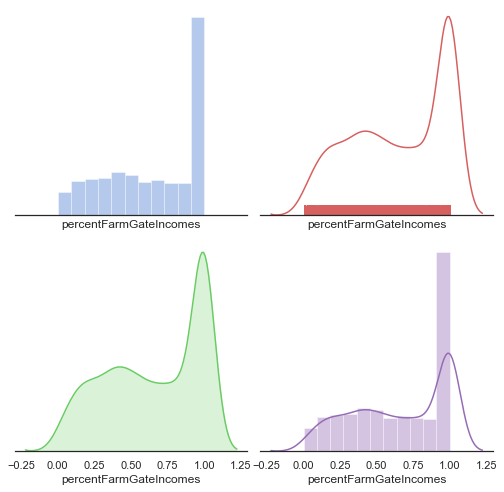

In [7]:
histogramPlot(df, "percentFarmGateIncomes")

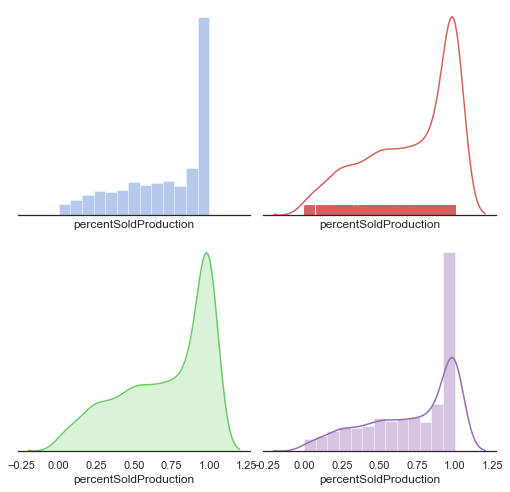

In [8]:
histogramPlot(df, "percentSoldProduction")

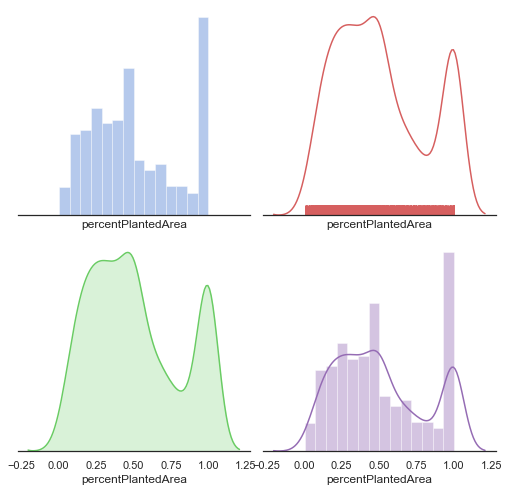

In [9]:
histogramPlot(df, "percentPlantedArea")

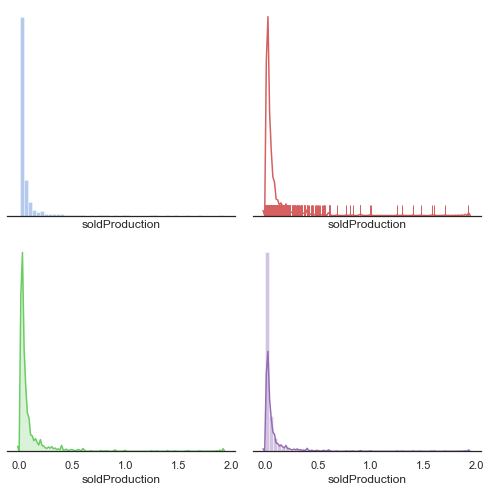

In [10]:
histogramPlot(df, "soldProduction")

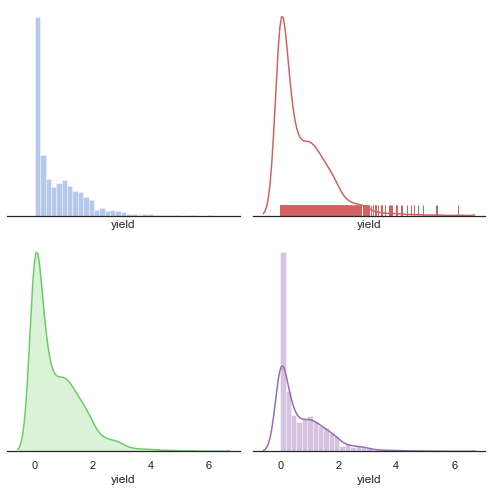

In [11]:
histogramPlot(df, "yield")

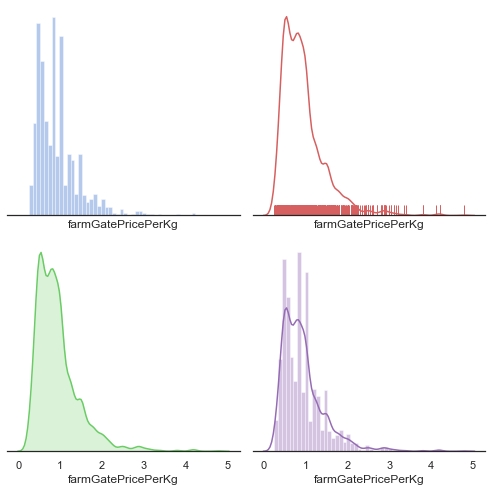

In [12]:
histogramPlot(df, "farmGatePricePerKg")

# Descriptive analysis

In [13]:
def plotingPercentageHistogram(variable, xName, yName):
    dfColumn = df[variable] * 100
    dfColumn.plot.hist(grid=True, bins=20, rwidth=0.9,
                    color='#4a4a4a')
    plt.xlabel(xName)
    plt.ylabel(yName)
    plt.rcParams["font.family"] = "serif"
    plt.grid(axis='y', alpha=0.75)

In [14]:
def plotingHistogram(variable, xName, yName):
    dfColumn = df[variable]
    dfColumn.plot.hist(grid=True, bins=20, rwidth=0.9,
                    color='#4a4a4a')
    plt.xlabel(xName)
    plt.ylabel(yName)
    plt.rcParams["font.family"] = "serif"
    plt.grid(axis='y', alpha=0.75)

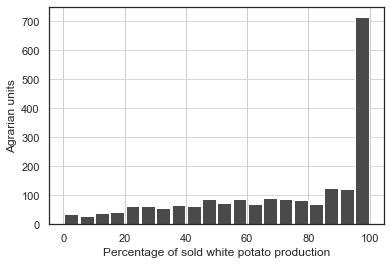

In [15]:
plotingPercentageHistogram("percentSoldProduction", "Percentage of sold white potato production", "Agrarian units")

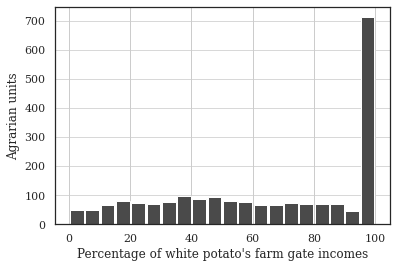

In [16]:
plotingPercentageHistogram("percentFarmGateIncomes", "Percentage of white potato's farm gate incomes", "Agrarian units")

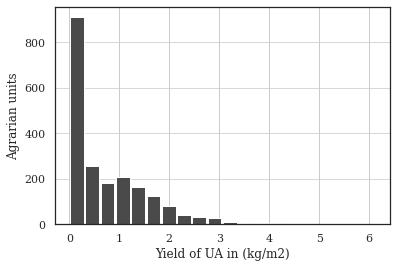

In [25]:
plotingHistogram("yield", "Yield of UA in (kg/m2)", "Agrarian units")

In [18]:
df["marketChannelDirectednessString"] = df["marketChannelDirectedness"].map({1: "Collector", 2: "Wholesaler", 3: "Retailer", 4: "Final consumer"})
df["marketSizeString"] = df["marketSize"].map({1: "Local market", 2: "Regional market", 3: "Lima markets"})

In [19]:
def boxPlotMultiple(x, y, yName, orderedList):
    ax = sns.boxplot(x=x, y=y, data=df, color='.50', order=orderedList)
    plt.xlabel("")
    plt.ylabel(yName)
    plt.rcParams["font.family"] = "serif"
    plt.grid(axis='y', alpha=0.75)

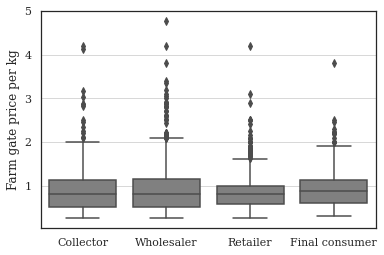

In [20]:
boxPlotMultiple("marketChannelDirectednessString", "farmGatePricePerKg", "Farm gate price per kg", ["Collector", "Wholesaler", "Retailer", "Final consumer"])

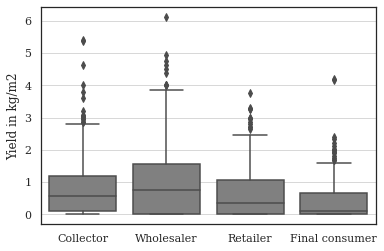

In [23]:
boxPlotMultiple("marketChannelDirectednessString", "yield", "Yield in kg/m2", ["Collector", "Wholesaler", "Retailer", "Final consumer"])

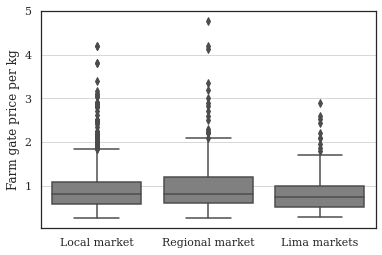

In [21]:
boxPlotMultiple("marketSizeString", "farmGatePricePerKg", "Farm gate price per kg", ["Local market", "Regional market", "Lima markets"])

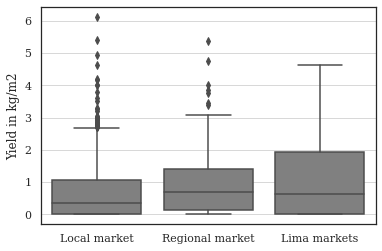

In [24]:
boxPlotMultiple("marketSizeString", "yield", "Yield in kg/m2", ["Local market", "Regional market", "Lima markets"])

In [21]:
def barPlotCountMultiple(variable, orderedList):
    ax = sns.barplot(x=df[variable].value_counts().keys(), y=df[variable].value_counts(), data=df, color='#4a4a4a', order=orderedList)
    #plt.bar(, df[variable].value_counts(), color='#4a4a4a', order=["Collector", "Wholesaler"])
    plt.xlabel("")
    plt.ylabel("Agrarian units")
    plt.rcParams["font.family"] = "serif"
    plt.grid(axis='y', alpha=0.75)

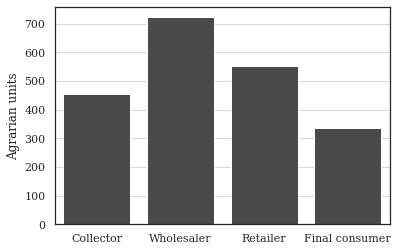

In [22]:
barPlotCountMultiple("marketChannelDirectednessString", ["Collector", "Wholesaler", "Retailer", "Final consumer"])

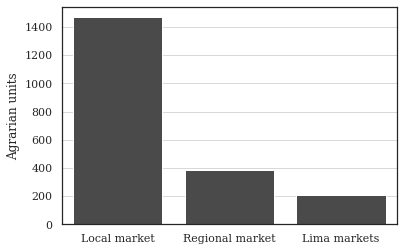

In [23]:
barPlotCountMultiple("marketSizeString", ["Local market", "Regional market", "Lima markets"])

In [119]:
df.groupby(["marketSize", "marketChannelDirectedness"])["farmGatePricePerKg"].mean()

marketSize  marketChannelDirectedness
1           1                            0.923549
            2                            0.949888
            3                            0.908392
            4                            0.947096
2           1                            0.978817
            2                            1.026403
            3                            0.879087
            4                            1.056463
3           1                            0.643989
            2                            0.867611
            3                            0.817685
            4                            0.960185
Name: farmGatePricePerKg, dtype: float64

In [131]:
df["farmIncomes"] = df["farmGatePricePerKg"] * df["soldProduction"] * 100000
df_mean = df.groupby(["marketSizeString", "marketChannelDirectednessString"]).mean()

In [138]:
# counts
df.groupby(["marketSizeString", "marketChannelDirectednessString"]).count()["farmGatePricePerKg"]

marketSizeString  marketChannelDirectednessString
Lima markets      Collector                           23
                  Final consumer                      12
                  Retailer                            29
                  Wholesaler                         145
Local market      Collector                          308
                  Final consumer                     303
                  Retailer                           454
                  Wholesaler                         404
Regional market   Collector                          123
                  Final consumer                      21
                  Retailer                            69
                  Wholesaler                         173
Name: farmGatePricePerKg, dtype: int64

In [132]:
# soles
df_mean["farmGatePricePerKg"]

marketSizeString  marketChannelDirectednessString
Lima markets      Collector                          0.643989
                  Final consumer                     0.960185
                  Retailer                           0.817685
                  Wholesaler                         0.867611
Local market      Collector                          0.923549
                  Final consumer                     0.947096
                  Retailer                           0.908392
                  Wholesaler                         0.949888
Regional market   Collector                          0.978817
                  Final consumer                     1.056463
                  Retailer                           0.879087
                  Wholesaler                         1.026403
Name: farmGatePricePerKg, dtype: float64

In [133]:
# in tons
df_mean["soldProduction"] * 100

marketSizeString  marketChannelDirectednessString
Lima markets      Collector                          10.479130
                  Final consumer                     11.119500
                  Retailer                            6.954483
                  Wholesaler                         17.966069
Local market      Collector                           4.852092
                  Final consumer                      0.990783
                  Retailer                            2.607052
                  Wholesaler                          5.653468
Regional market   Collector                           4.409984
                  Final consumer                      3.418571
                  Retailer                            3.598797
                  Wholesaler                         10.075965
Name: soldProduction, dtype: float64

In [135]:
# in tons
df_mean["farmIncomes"]

marketSizeString  marketChannelDirectednessString
Lima markets      Collector                           8285.239130
                  Final consumer                     12305.666667
                  Retailer                            6789.068966
                  Wholesaler                         19575.691034
Local market      Collector                           4267.693653
                  Final consumer                       900.534971
                  Retailer                            2585.919446
                  Wholesaler                          6046.643124
Regional market   Collector                           4780.321548
                  Final consumer                      4554.476190
                  Retailer                            4216.097921
                  Wholesaler                         12091.095133
Name: farmIncomes, dtype: float64